# Exploratory Data Visualization on Powerlifting

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
newDf = pd.read_csv('./newData/openpowerlifting.csv')
newDf['Date'] = pd.to_datetime(newDf['Date'])
newDf['Month'] = newDf['Date'].apply(lambda x:x.month)
newDf['Year'] = newDf['Date'].apply(lambda x:x.year)

C:\Users\j_fel\AppData\Local\Temp\ipykernel_18128\125354632.py:1: DtypeWarning: Columns (31,33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  newDf = pd.read_csv('./newData/openpowerlifting-2024-01-06-4c732975.csv')


## Analysis on Meets

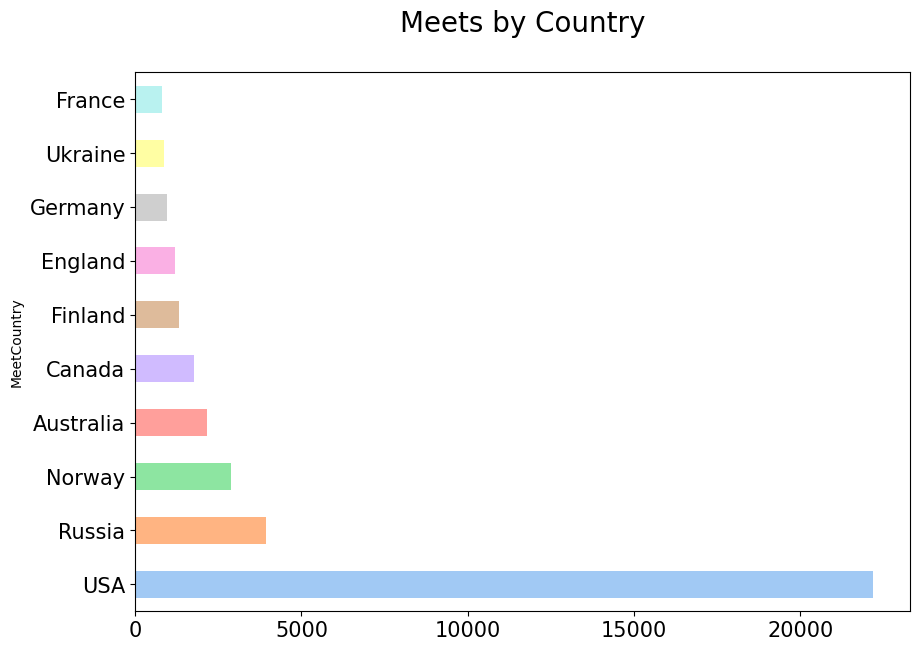

Meets by Country:

MeetCountry
USA          22184
Russia        3946
Norway        2888
Australia     2153
Canada        1775
Finland       1312
England       1197
Germany        969
Ukraine        862
France         802
Name: count, dtype: int64


In [6]:
unique_meets_countries = newDf[['MeetName', 'Date', 'MeetCountry','Year', 'Month']].drop_duplicates()

plt.figure(figsize=(10,7))
plt.title('Meets by Country\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
unique_meets_countries['MeetCountry'].value_counts()[:10].sort_values(ascending=False).plot(kind='barh', color=sns.color_palette('pastel', 10))
plt.show()
print('Meets by Country:\n')
print(unique_meets_countries['MeetCountry'].value_counts()[:10])





In [ ]:
unique_meets_countries['MeetCountry'].value_counts()[:10].to_csv('meets_by_country.csv')
#Current country populations, as of  2024 October

usPop = 346027869
norwayPop = 5514477
canadaPop = 41288599
aussiePop = 26713205
icePop = 144551329


perCapDict = {'United States': len(unique_meets_countries[unique_meets_countries['MeetCountry']=='USA']) / usPop * 100000,
            'Norway': len(unique_meets_countries[unique_meets_countries['MeetCountry']=='Norway']) / norwayPop * 100000,
            'Canada': len(unique_meets_countries[unique_meets_countries['MeetCountry']=='Canada']) / canadaPop * 100000,
            'Australia': len(unique_meets_countries[unique_meets_countries['MeetCountry']=='Australia']) / aussiePop * 100000,
            'Russia': len(unique_meets_countries[unique_meets_countries['MeetCountry']=='Russia']) / icePop * 100000}

perCapDf = pd.Series(perCapDict)

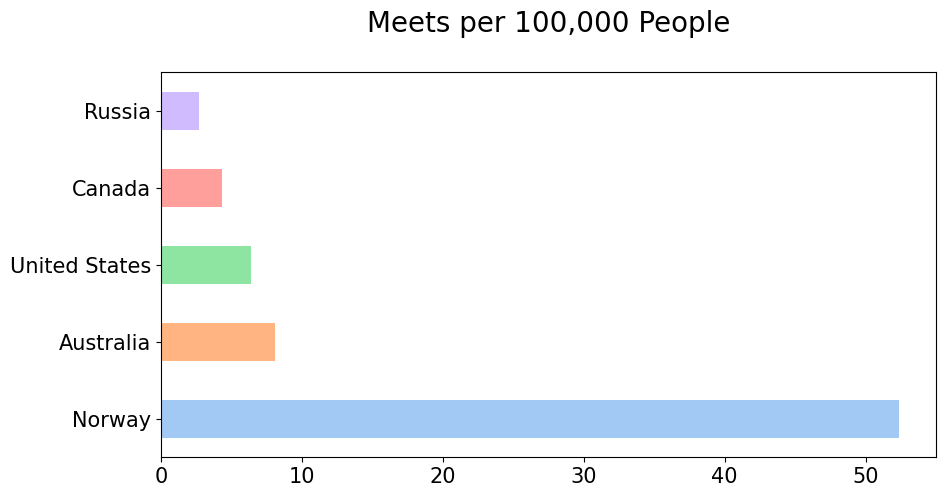

Meets per 100,000 People

United:  6.41
Norway:  52.37
Canada:  4.3
Austra:  8.06
Russia:  2.73


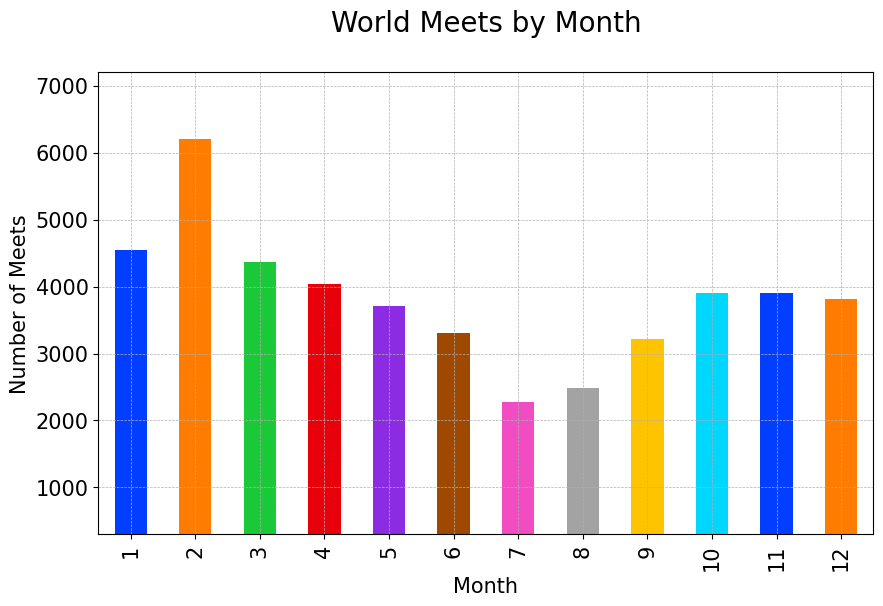

Month
1     4548
2     6205
3     4371
4     4037
5     3712
6     3308
7     2271
8     2486
9     3213
10    3909
11    3903
12    3817
Name: Month, dtype: int64


In [ ]:
plt.figure(figsize=(10,5))
perCapDf.sort_values(ascending=False).plot(kind='barh', color=sns.color_palette('pastel', 10) )
plt.title('Meets per 100,000 People\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Meets per 100,000 People\n')
for k,v in perCapDict.items():
    print(k[:6] + ': ',(round(v,2)))
    
plt.figure(figsize=(10,6))
unique_meets_countries.groupby(['Month'])['Month'].count().plot(kind='bar',color=sns.color_palette('bright', 12))
plt.title('World Meets by Month\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(300, unique_meets_countries['Month'].value_counts().max() + 1000)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Meets', fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
print(unique_meets_countries.groupby(['Month'])['Month'].count())

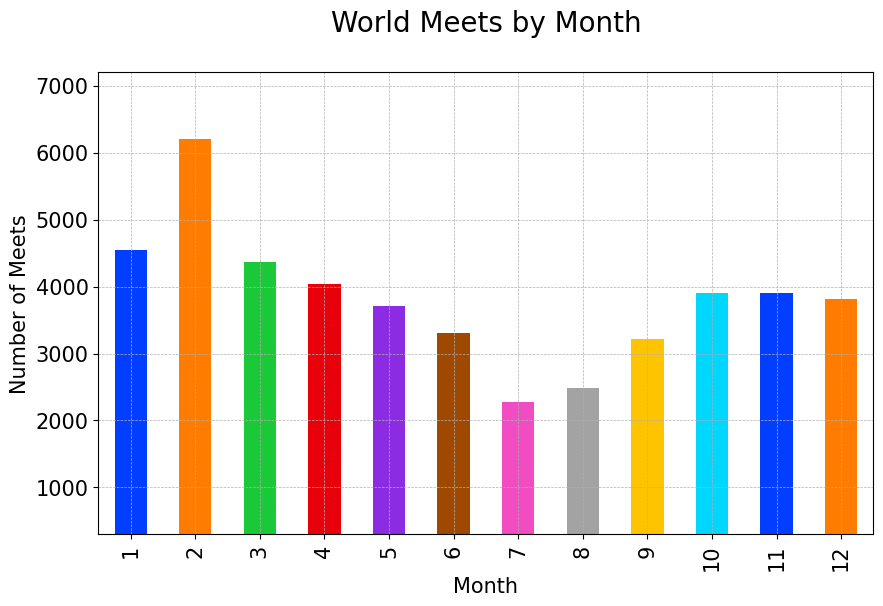

Month
1     4548
2     6205
3     4371
4     4037
5     3712
6     3308
7     2271
8     2486
9     3213
10    3909
11    3903
12    3817
Name: Month, dtype: int64


In [10]:
plt.figure(figsize=(10,6))
unique_meets_countries.groupby(['Month'])['Month'].count().plot(kind='bar',color=sns.color_palette('bright', 12))
plt.title('World Meets by Month\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(300, unique_meets_countries['Month'].value_counts().max() + 1000)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Meets', fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
print(unique_meets_countries.groupby(['Month'])['Month'].count())

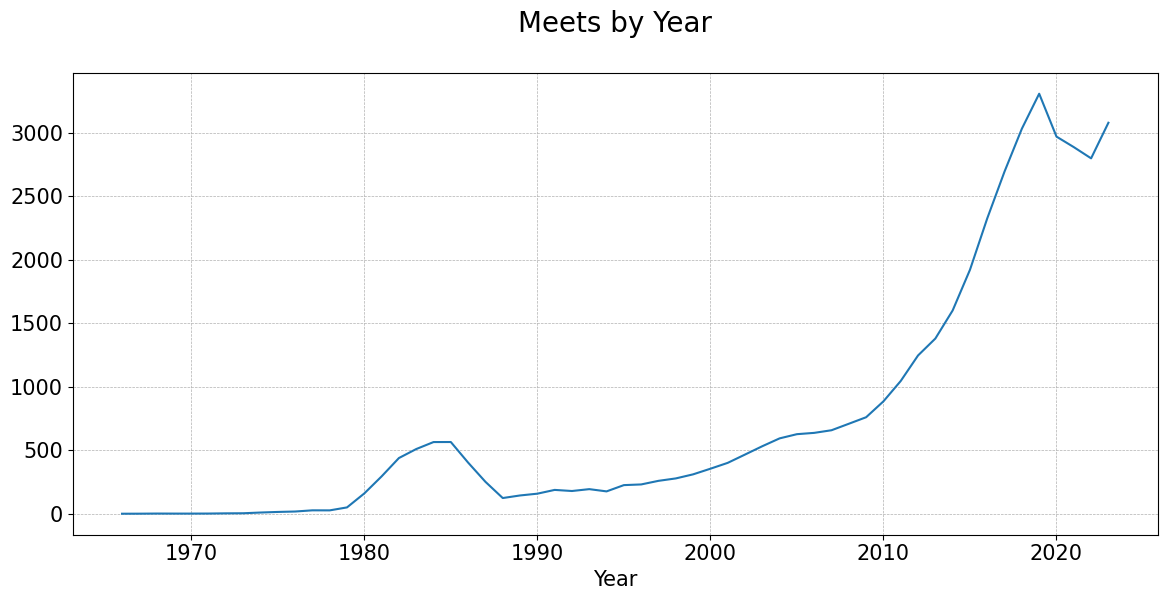

In [11]:
plt.figure(figsize=(14,6))
unique_meets_countries[unique_meets_countries['Year'] < 2024].groupby(['Year'])['Year'].count().rolling(window=3).mean().plot(kind='line')
plt.title('Meets by Year\n',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Quite interesting to see a bump in the 1980s, could be because of the massive increase of action packed buff men movies with arnold schwarzenegger, sylvester stalone and etc becoming relevant

In [12]:
temp = unique_meets_countries[unique_meets_countries['Year'] < 2024].groupby(['Year'])['Year'].count().rolling(window=3).mean()

temp.to_csv('meets_by_year.csv')

### Data Cleaning and Processing

In [13]:
df = pd.read_csv('./newData/openpowerlifting-2024-01-06-4c732975.csv')

C:\Users\j_fel\AppData\Local\Temp\ipykernel_18128\2926321014.py:1: DtypeWarning: Columns (31,33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./newData/openpowerlifting-2024-01-06-4c732975.csv')


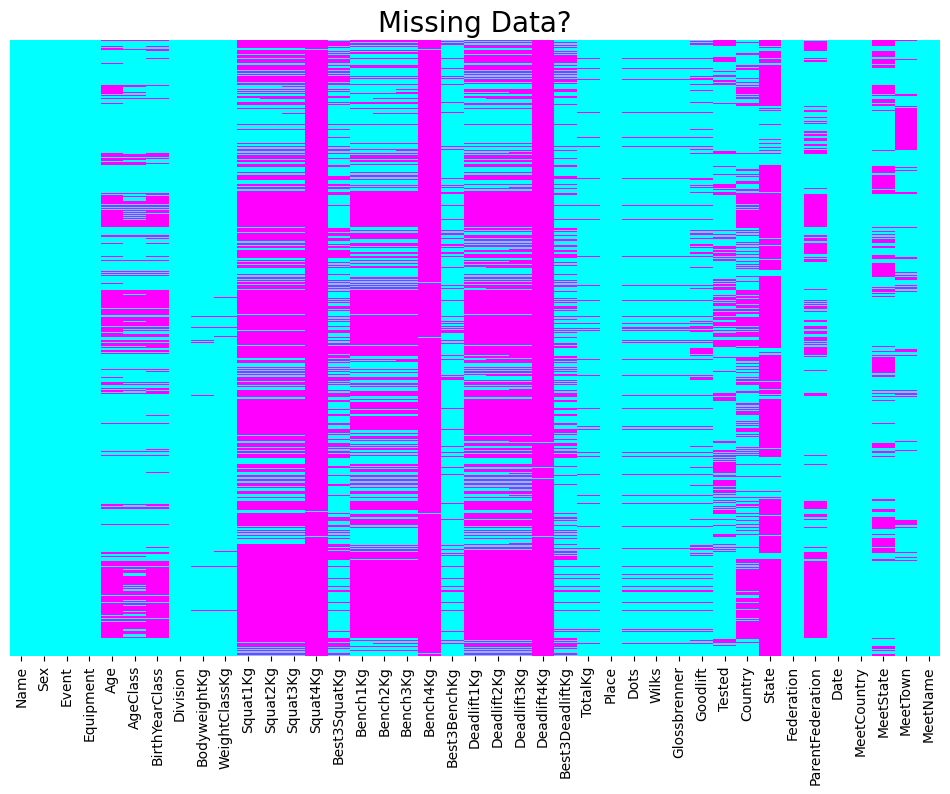

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='cool',cbar=False,yticklabels=False)
plt.title('Missing Data?',fontsize=20)
plt.show()

In [ ]:
df.drop(['State','ParentFederation','Squat1Kg', 'Squat2Kg','Squat3Kg','Squat4Kg','Bench1Kg','Bench2Kg','Bench3Kg','Bench4Kg','Deadlift1Kg','Deadlift2Kg','Deadlift3Kg','Deadlift4Kg'],axis=1,inplace=True)

### Classing by Age

In [23]:
def age_class(x):
    if x < 13:
        return 'CHILD'
    if x >= 13 and x <= 17:
        return 'YOUTH'
    if x >= 18 and x <= 34:
        return 'ADULT'
    if x >= 35:
        return 'MASTERS'

In [24]:
df['AgeClass'] = df['Age'].apply(age_class)

## Relative Strength

In [25]:
def squatBody(x):
    return x['Best3SquatKg'] / x['BodyweightKg']

def benchBody(x):
    return x['Best3BenchKg'] / x['BodyweightKg']

def deadliftBody(x):
    return x['Best3DeadliftKg'] / x['BodyweightKg']

def totalLiftBody(x):
    return x['TotalKg'] / x['BodyweightKg']

In [26]:
df['Squat / BW'] = df.apply(squatBody,axis=1)
df['Bench / BW'] = df.apply(benchBody,axis=1)
df['Deadlift / BW'] = df.apply(deadliftBody,axis=1)
df['Total / BW'] = df.apply(totalLiftBody,axis=1)

## Bodyweight Classing by Sex

In [27]:
male = df[df['Sex']=='M']
female = df[df['Sex']=='F']

In [28]:
def male_weight_class(x):
    if x <= 56:
        return '56 Kg'
    if x <= 62 and x > 56:
        return '62 Kg'
    if x <= 69 and x > 62:
        return '69 Kg'
    if x <= 77 and x > 69:
        return '77 Kg'
    if x <= 85 and x > 77:
        return '85 Kg'
    if x <= 94 and x > 85:
        return '94 Kg'
    if x <= 105 and x > 94:
        return '105 Kg'
    if x > 105:
        return '105+ Kg'
        
def female_weight_class(x):
    if x <= 48:
        return '48 Kg'
    if x <= 53 and x > 48:
        return '53 Kg'
    if x <= 58 and x > 53:
        return '58 Kg'
    if x <= 63 and x > 58:
        return '63 Kg'
    if x <= 69 and x > 63:
        return '69 Kg'
    if x <= 75 and x > 69:
        return '75 Kg'
    if x <= 90 and x > 75:
        return '90 Kg'
    if x > 90:
        return '90+ Kg'

In [29]:
male['WeightClassKg'] = male['BodyweightKg'].apply(male_weight_class)
female['WeightClassKg'] = female['BodyweightKg'].apply(female_weight_class)

C:\Users\j_fel\AppData\Local\Temp\ipykernel_18128\3676673241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['WeightClassKg'] = male['BodyweightKg'].apply(male_weight_class)
C:\Users\j_fel\AppData\Local\Temp\ipykernel_18128\3676673241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['WeightClassKg'] = female['BodyweightKg'].apply(female_weight_class)


In [30]:
df = pd.concat([male,female])

### Exploratory Data Analysis

## Gender

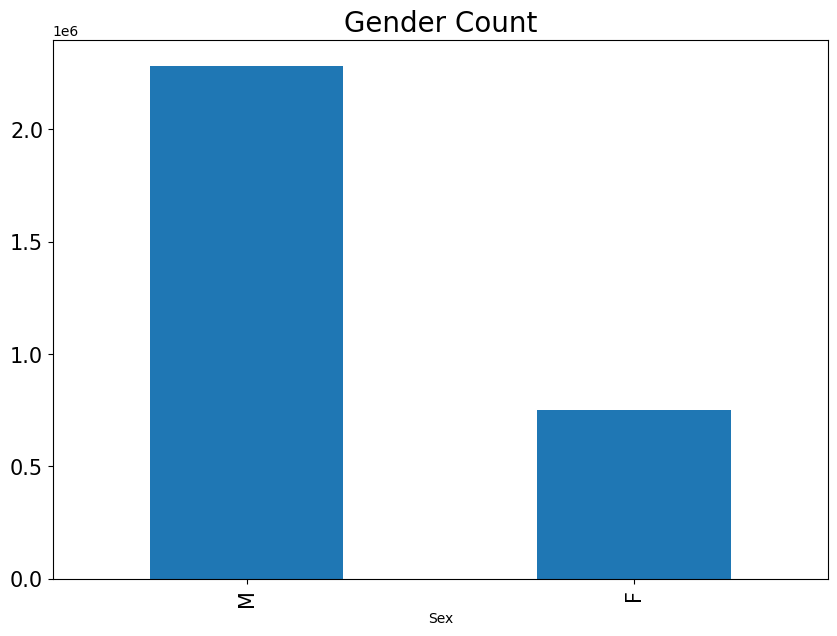

Percentage of Male lifters: 75%

Sex
M    2284446
F     751412
Name: count, dtype: int64


In [34]:
plt.figure(figsize=(10,7))
df['Sex'].value_counts().plot(kind='bar')
plt.title('Gender Count',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print('Percentage of Male lifters: {}%\n'.format(round(len(df[df['Sex']=='M'])/len(df)*100),4))
print(df['Sex'].value_counts())

In [35]:
df['Sex'].value_counts().to_csv('sexratio.csv')

## Equipment

In [ ]:
def convert_equipment(x):
    if x == 'Straps':
        return 'Wraps'
    return x

In [38]:
df['Equipment'] = df['Equipment'].apply(convert_equipment)

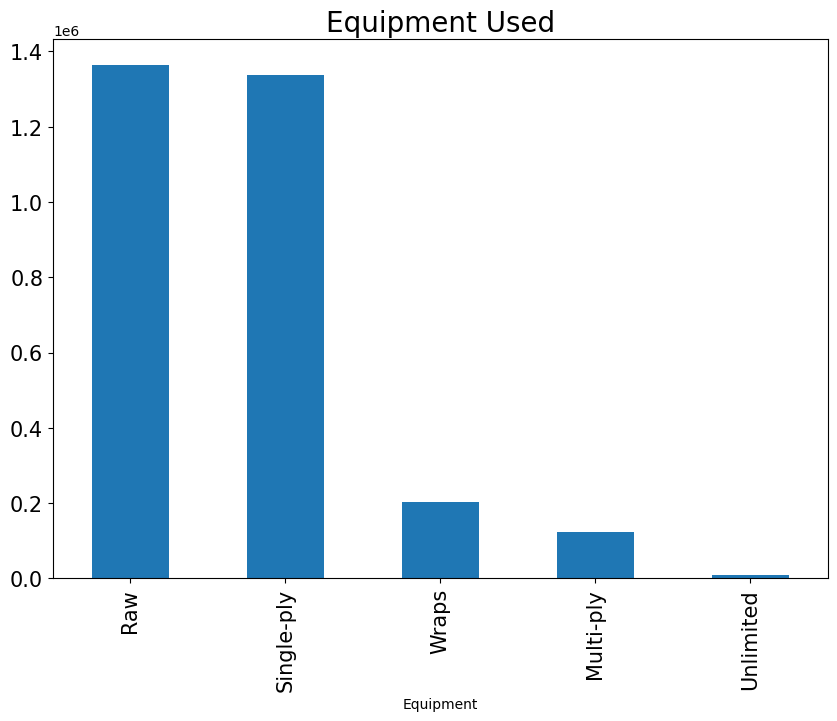

Equipment used: 

Equipment
Raw           1363430
Single-ply    1337262
Wraps          202077
Multi-ply      124044
Unlimited        9045
Name: count, dtype: int64


In [39]:
plt.figure(figsize=(10,7))
df['Equipment'].value_counts().plot(kind='bar')
plt.title('Equipment Used',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print('Equipment used: \n')
print(df['Equipment'].value_counts())

In [40]:
df['Equipment'].value_counts().to_csv('equipment.csv')

# Age

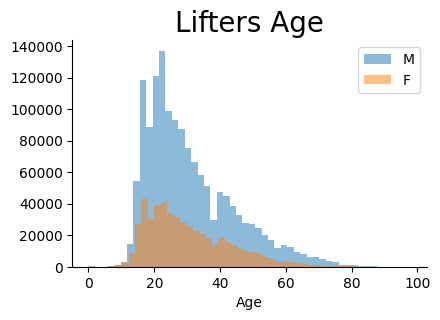

In [41]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Age',bins=50,alpha=.5)
plt.title('Lifters Age',fontsize=20)
plt.legend(loc=1)
plt.show()

In [42]:
df.to_csv('cleaned_data.csv')

## Bodyweight

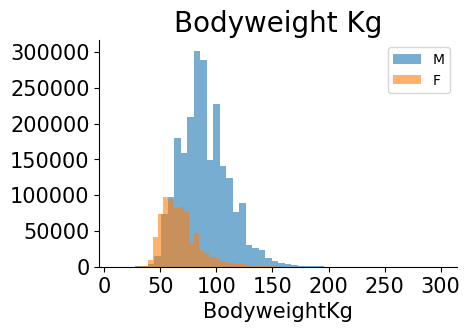

In [45]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'BodyweightKg',bins=50,alpha=.6)
plt.title('Bodyweight Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.legend(loc=1)
plt.show()

# Absolute Strength

## Absolute Strength by Bodyweight and Equipment 

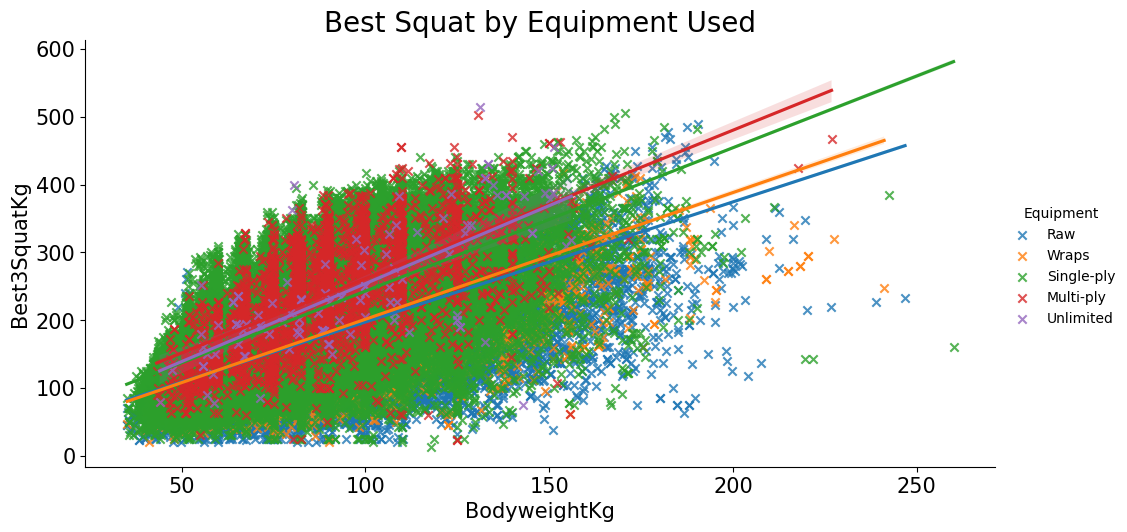

Equipment Used by Lifters:

Equipment
Raw           1363430
Single-ply    1337262
Wraps          202077
Multi-ply      124044
Unlimited        9045
Name: count, dtype: int64


In [46]:
sns.lmplot(x='BodyweightKg',
           y='Best3SquatKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           aspect=2)
plt.title('Best Squat by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Best3SquatKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

Multi-ply users had a significate increase in squat performance. Single-ply only slightly better than wraps. Raw lifters on average performed last in the squat. Notice the positive correlation between Bodyweight and BestSquatKg.

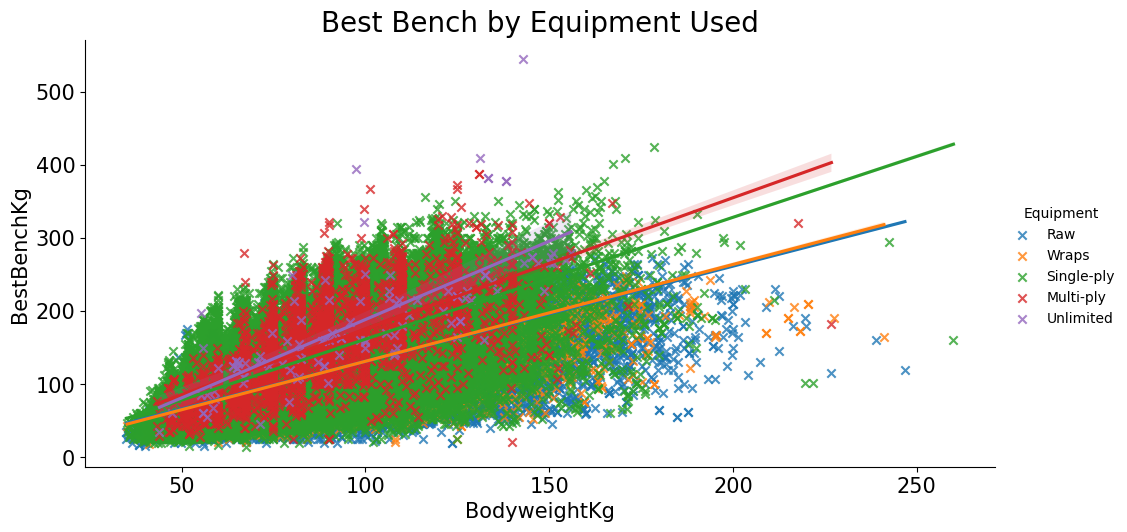

Equipment Used by Lifters:

Equipment
Raw           1363430
Single-ply    1337262
Wraps          202077
Multi-ply      124044
Unlimited        9045
Name: count, dtype: int64


In [47]:
sns.lmplot(x='BodyweightKg',
           y='Best3BenchKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           aspect=2)
plt.title('Best Bench by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('BestBenchKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

Once again, multi-ply on the top, single-ply second and raw, along with wraps, on the bottom. Notice the positive correlation between Bodyweight and BestBenchKg.

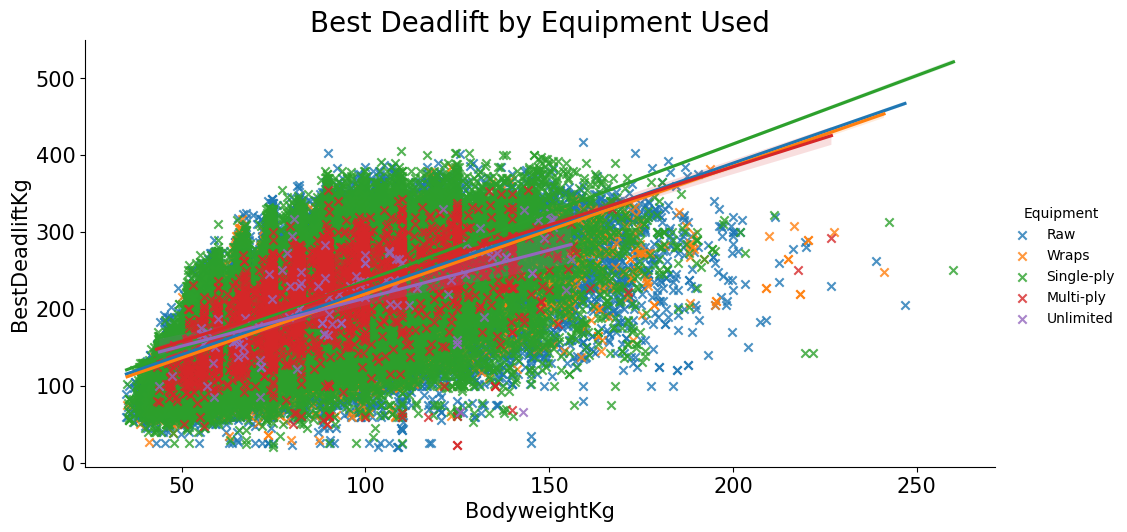

Equipment Used by Lifters:

Equipment
Raw           1363430
Single-ply    1337262
Wraps          202077
Multi-ply      124044
Unlimited        9045
Name: count, dtype: int64


In [48]:
sns.lmplot(x='BodyweightKg',
           y='Best3DeadliftKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           aspect=2)
plt.title('Best Deadlift by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('BestDeadliftKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

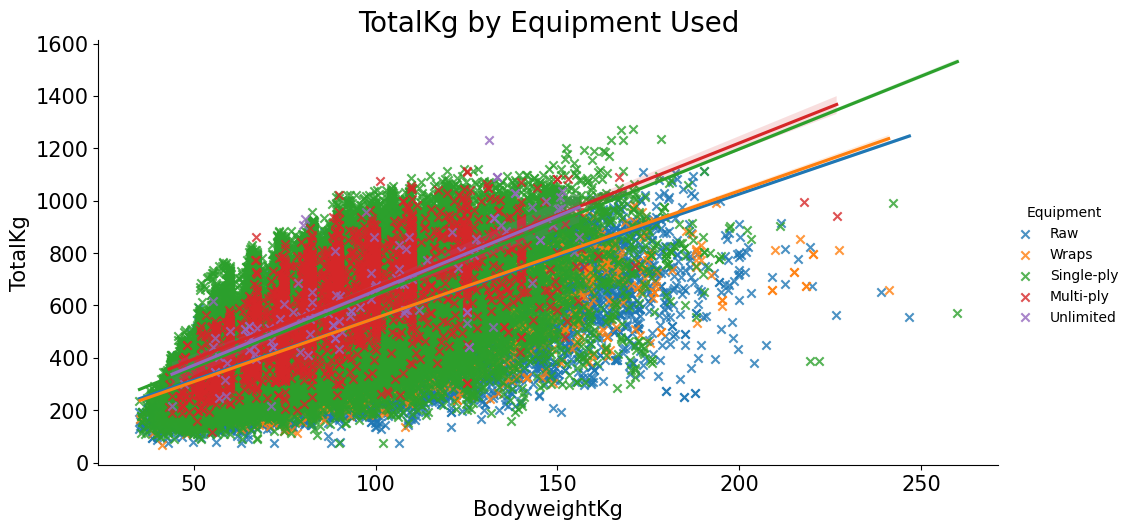

Equipment Used by Lifters:

Equipment
Raw           1363430
Single-ply    1337262
Wraps          202077
Multi-ply      124044
Unlimited        9045
Name: count, dtype: int64


In [49]:
sns.lmplot(x='BodyweightKg',
           y='TotalKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           aspect=2)
plt.title('TotalKg by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('TotalKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)  
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

## Absolute Strength by Sex

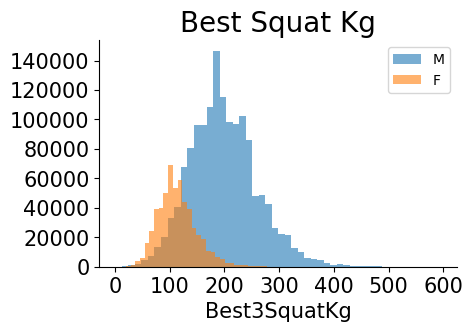

In [50]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Best3SquatKg',bins=50,alpha=.6)
plt.title('Best Squat Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Best3SquatKg',fontsize=15)
plt.legend(loc=1)
plt.show()

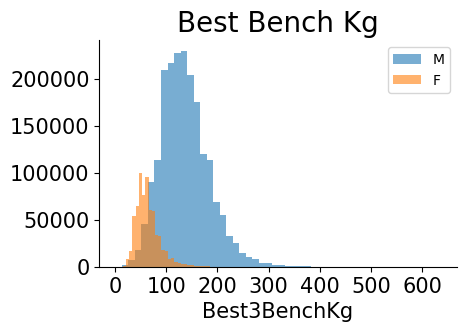

In [51]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Best3BenchKg',bins=50,alpha=.6)
plt.title('Best Bench Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Best3BenchKg',fontsize=15)
plt.legend(loc=1)
plt.show()

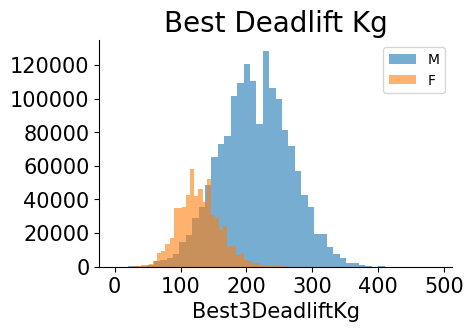

In [52]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Best3DeadliftKg',bins=50,alpha=.6)
plt.title('Best Deadlift Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Best3DeadliftKg',fontsize=15)
plt.legend(loc=1)
plt.show()

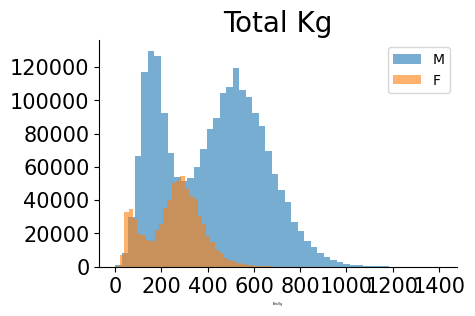

In [53]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'TotalKg',bins=50,alpha=.6)
plt.title('Total Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('TotalKg',fontsize=2)
plt.legend(loc=1)
plt.show()

A few things here. 
- We are reminded that weightlifting is a man's sport. 
- All genders' graphs resemble a normal distribution.
- The female outliers are comparable to men on the bottom, but not on the top.

Questions.
- Do males lift more because they are heavier, or because men are just physically stronger?

# Relative Strength

### Male to Female Ratios

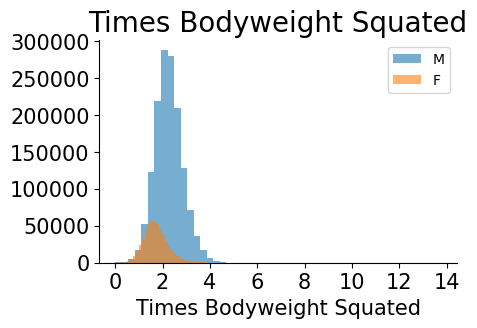

In [78]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Squat / BW',bins=50,alpha=.6)
plt.title('Times Bodyweight Squated',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Times Bodyweight Squated',fontsize=15)
plt.legend(loc=1)
plt.show()

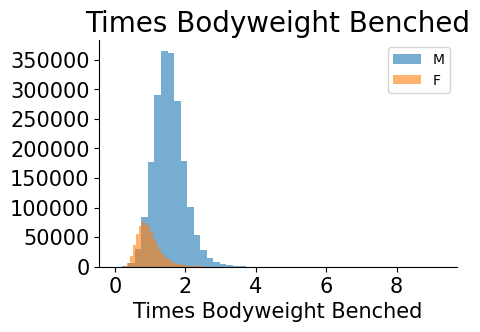

In [55]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Bench / BW',bins=50,alpha=.6)
plt.title('Times Bodyweight Benched',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Times Bodyweight Benched',fontsize=15)
plt.legend(loc=1)
plt.show()

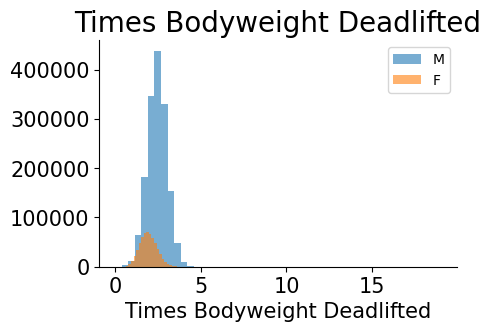

In [56]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Deadlift / BW',bins=50,alpha=.6)
plt.title('Times Bodyweight Deadlifted',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Times Bodyweight Deadlifted',fontsize=15)
plt.legend(loc=1)
plt.show()

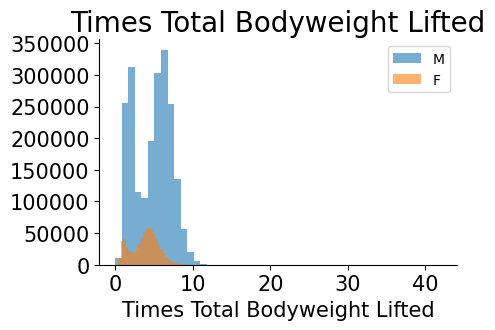

In [57]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Total / BW',bins=50,alpha=.6)
plt.title('Times Total Bodyweight Lifted',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Times Total Bodyweight Lifted',fontsize=15)
plt.legend(loc=1)
plt.show()

## Relative Strength Flaws

It is obvious why we cannot judge strength by an absolute measurement. For the most part, bigger athletes and lift heavier weights. But does the bodyweight multiplier (strength relative to bodyweight) solve the problem of judging strength across different genders and weight classes? Let's take a visual look.

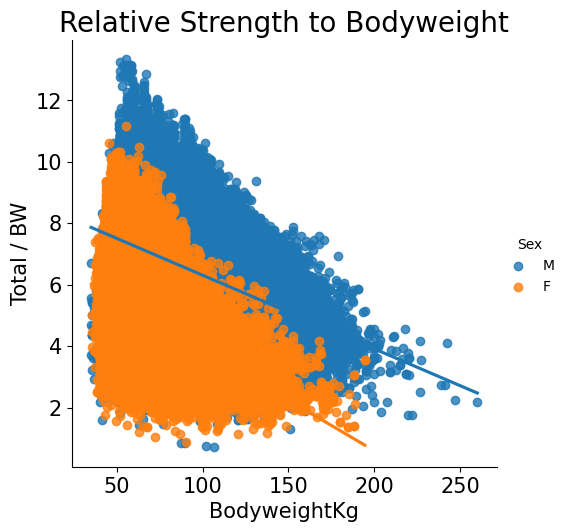

In [63]:
sns.lmplot(data=df.dropna(),
           x='BodyweightKg',
           y='Total / BW',
           hue='Sex',
           )
plt.title('Relative Strength to Bodyweight',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Total / BW',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()

Interesting! It seems that judging overall strength by the bodyweight multiplier massively favors the lighter lifters. The lighter lifters are the ones lifting several more times their bodyweight, way more than the heavier lifters. Is there a natual limit to the strength to bodyweight measurement?

# Wilks

In [82]:
df.filter(items=['Name','BodyweightKg','TotalKg','Total / BW','Wilks','Sex'])[df['Sex']=='F'].sort_values(ascending=False,by='Wilks')[:10]

,Name,BodyweightKg,TotalKg,Total / BW,Wilks,Sex
1750145,Laura Phelps-Stackhouse,75.00,816.47,10.886267,776.17,F
1785743,Deana Tollefson,82.80,862.50,10.416667,774.76,F
2275798,Marianne Kosonen,51.90,613.00,11.811175,765.33,F
1749004,Laura Phelps-Stackhouse,74.75,802.86,10.740602,764.83,F
1015269,Heidi Howar,67.13,746.16,11.115150,764.56,F
324981,Heidi Howar,59.24,678.12,11.446995,763.55,F
1234645,Heidi Howar,60.00,682.50,11.375000,760.91,F
1784574,Deana Tollefson,81.70,840.50,10.287638,760.31,F
1193450,Heidi Howar,59.96,680.39,11.347398,758.95,F
1752137,Laura Phelps-Stackhouse,75.00,796.05,10.614000,756.76,F


In [83]:
df.filter(items=['Name','BodyweightKg','TotalKg','Total / BW','Wilks','Sex'])[df['Sex']=='M'].sort_values(ascending=False,by='Wilks')[:10]

,Name,BodyweightKg,TotalKg,Total / BW,Wilks,Sex
1191069,Dave Hoff #1,132.60,1407.50,10.614630,793.33,M
1785714,Dave Hoff #1,135.00,1387.50,10.277778,779.74,M
1010516,Dave Hoff #1,122.97,1363.05,11.084411,779.38,M
1784586,Dave Hoff #1,131.15,1370.00,10.446054,773.66,M
1007052,Dave Hoff #1,131.09,1365.31,10.415058,771.07,M
1212530,Dave Hoff #1,133.20,1367.50,10.266517,770.20,M
1752357,Dave Hoff #1,123.79,1342.63,10.846030,766.63,M
1008812,Chris Della Fave,109.77,1301.81,11.859433,766.60,M
1750424,Dave Hoff #1,126.55,1342.63,10.609482,763.22,M
1753695,Shawn Frankl,90.00,1192.95,13.255000,761.57,M


In [67]:
wilksByName = df.filter(['Name','Sex','BodyweightKg','WeightClassKg','Wilks']).sort_values(ascending=False,by='Wilks')

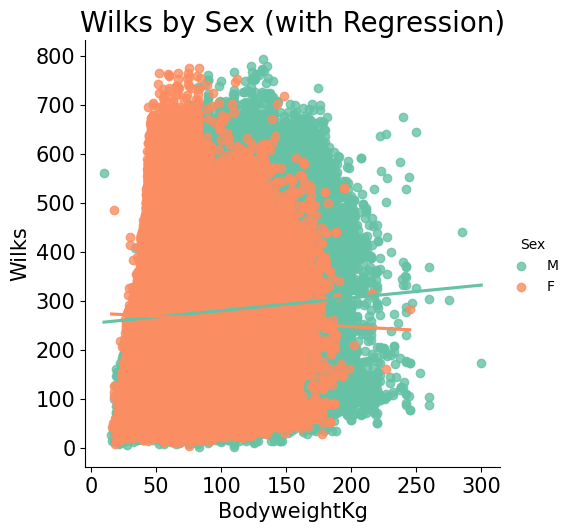

In [80]:
sns.lmplot(x = 'BodyweightKg',
           y = 'Wilks',
           data = wilksByName.dropna(),
           hue = 'Sex',
           palette='Set2'
           )
plt.title('Wilks by Sex (with Regression)',fontsize=20)
plt.xlabel('BodyweightKg',fontsize=15)
plt.ylabel('Wilks',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()